# Aggregate

Plot fusion results across all files

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [23]:
df = pd.read_csv("/Users/elizabeth/Desktop/Cambridge/Dissertation/data results/aggregate.csv")
df['end'] = df['end'].str.strip() # strip newline characters

In [24]:
df

,fusable,end,max_fusable_length,total_instructions,instructions_after_fuse,instructions_fused,percentage_fused,average_fusion_length
0,ARITHMETIC,NaN,0,271036826384,228503082716,42533743668,15.692976,1.186141
1,ARITHMETIC,MEMORY,0,271036826384,191581131966,79455694418,29.315461,1.414737
2,ARITHMETIC,BRANCH,0,271036826384,211634217149,59402609235,21.916804,1.280685
3,ARITHMETIC,MEMORY & BRANCH,0,271036826384,174712266399,96324559985,35.539289,1.551333
4,ARITHMETIC,NaN,1,271036826384,271036826384,0,0.000000,1.000000
5,ARITHMETIC,MEMORY,1,271036826384,271036826384,0,0.000000,1.000000
6,ARITHMETIC,BRANCH,1,271036826384,271036826384,0,0.000000,1.000000
7,ARITHMETIC,MEMORY & BRANCH,1,271036826384,271036826384,0,0.000000,1.000000
8,ARITHMETIC,NaN,2,271036826384,242837884216,28198942168,10.404100,1.116122
9,ARITHMETIC,MEMORY,2,271036826384,218414761922,52622064462,19.415098,1.240927


In [25]:
grouped = df.sort_values(by=['fusable', 'end'], na_position='first')
grouped = grouped.groupby(['fusable', 'end'], dropna=False, sort=False)

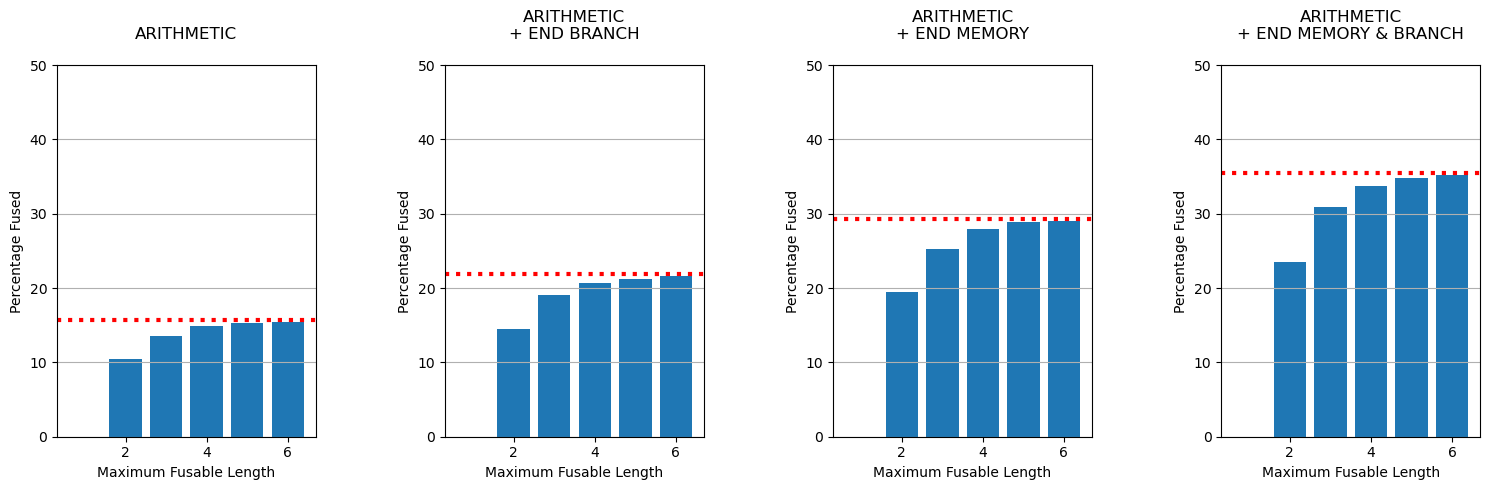

In [27]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    if (pd.notna(group_name[1])):
        end_name = f"+ END {group_name[1]}\n"
    else:
        end_name = ""
    
    group_title = (
        f"{group_name[0]}\n"
        f"{end_name}"
    )

    data = group_data.reset_index()
    first_value = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['max_fusable_length'][1:7], data['percentage_fused'][1:7])
    axes[i].set_title(f'{group_title}')
    axes[i].set_xlabel('Maximum Fusable Length')
    axes[i].set_ylabel('Percentage Fused')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=50)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()